In [1]:
!pip install --upgrade pandas

In [2]:
!pip install --upgrade pandas-datareader

In [3]:
!pip install yfinance --upgrade --no-cache-dir

In [4]:
# Import XGBoost

import xgboost

# XGBoost Classifier

from xgboost import XGBClassifier

# Classification report and confusion matrix

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Cross validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Pandas datareader to get the data

from pandas_datareader import data

# To plot the graphs

import matplotlib.pyplot as plt
import seaborn as sn

# For data manipulation
import pandas as pd
import numpy as np



In [5]:
# Set the stock list

stock_list = ["^BVSP", "USDBRL=X"]

# Set the start date and the end date

start_date = "2004-1-1"
end_date = "2020-1-28"


In [6]:
# Create a placeholder to store the stock data
stock_data_dictionary = {}

for stock_name in stock_list:

  # Get the data

  df = data.get_data_yahoo(stock_name, start_date, end_date)
  # Calculate the daily percent change
  df["daily_pct_change"] = df["Adj Close"].pct_change()

  # create the predictors
  predictor_list = []

  for r in range(2,10,2):
    df["pct_change_"+str(r)] = df.daily_pct_change.rolling(r).sum()
    df["std_"+str(r)] = df.daily_pct_change.rolling(r).std()
    predictor_list.append("pct_change_"+str(r))
    predictor_list.append("std_"+str(r))
   

  df["S_10"] = df["Adj Close"].rolling(window=10).mean()
  df["Corr"] = df["Adj Close"].rolling(window=10).corr(df["S_10"])
  df["S_30"] = df["Adj Close"].rolling(window=30).mean()
# df["Distancia_10"] = df["Adj Close"]/df["S_10"]
  df["Dist_mean"] = df["S_10"]/df["S_30"]
  df["Open-Close"] = df["Open"] - df["Close"].shift(1)
  df["Open-Open"] = df["Open"] - df["Open"].shift(1)
  df["highReturn"] = df["Close"].pct_change()
  df["lowReturn"] = df["Low"].pct_change()
  df["Low-High"] = df["Low"] - df["High"]
  df["High/Low"] = df["High"]/df["Low"]


  predictor_list.append("Open-Close")
  predictor_list.append("Open-Open")
  predictor_list.append("S_10")
  predictor_list.append("Corr")
  predictor_list.append("highReturn")
  predictor_list.append("lowReturn")
  predictor_list.append("Low-High")
  predictor_list.append("High/Low")
  predictor_list.append("Dist_mean")
 # predictor_list.append("Distancia_10")
  
  # Target Variable


  df["return_next_day"] = df.daily_pct_change.shift(-1)
  df["actual_signal"] = np.where(df.return_next_day > 0, 1,-1)
  df = df.dropna()

  # Add the data to dictionary
  stock_data_dictionary.update({stock_name: df})

In [7]:
df["daily_pct_change"].tail()

Date
2020-01-22    0.005348
2020-01-23   -0.007029
2020-01-24   -0.002918
2020-01-27   -0.002303
2020-01-28    0.011203
Name: daily_pct_change, dtype: float64

In [8]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,daily_pct_change,pct_change_2,std_2,pct_change_4,std_4,pct_change_6,std_6,pct_change_8,std_8,S_10,Corr,S_30,Dist_mean,Open-Close,Open-Open,highReturn,lowReturn,Low-High,High/Low,return_next_day,actual_signal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,4.2113,4.1794,4.2109,4.2109,0.0,4.2109,0.005348,0.011812,0.000789,0.008805,0.005283,0.015692,0.006035,0.028912,0.008356,4.14213,0.919304,4.087970,1.013249,0.0224,0.0222,0.005348,0.003030,-0.0319,1.007633,-0.007029,-1
2020-01-23,4.1878,4.1556,4.1814,4.1813,0.0,4.1813,-0.007029,-0.001681,0.008752,-0.000476,0.007009,0.012160,0.006866,0.027161,0.008640,4.15398,0.865950,4.089890,1.015670,-0.0295,-0.0295,-0.007029,-0.005695,-0.0322,1.007749,-0.002918,-1
2020-01-24,4.1876,4.1474,4.1688,4.1691,0.0,4.1691,-0.002918,-0.009947,0.002907,0.001865,0.006518,-0.001142,0.005671,0.005745,0.006290,4.16168,0.754505,4.092619,1.016875,-0.0125,-0.0126,-0.002918,-0.001973,-0.0402,1.009693,-0.002303,-1
2020-01-27,4.2297,4.1595,4.1595,4.1595,0.0,4.1595,-0.002303,-0.005220,0.000435,-0.006902,0.005161,-0.005697,0.005583,0.006940,0.006189,4.17058,0.494153,4.095075,1.018438,-0.0096,-0.0093,-0.002303,0.002918,-0.0702,1.016877,0.011203,1
2020-01-28,4.2157,4.1869,4.2061,4.2061,0.0,4.2061,0.011203,0.008901,0.009550,-0.001046,0.007926,0.010765,0.006925,0.007759,0.006373,4.17661,0.493540,4.099882,1.018715,0.0466,0.0466,0.011203,0.006587,-0.0288,1.006879,-0.003019,-1


In [9]:
df

,High,Low,Open,Close,Volume,Adj Close,daily_pct_change,pct_change_2,std_2,pct_change_4,std_4,pct_change_6,std_6,pct_change_8,std_8,S_10,Corr,S_30,Dist_mean,Open-Close,Open-Open,highReturn,lowReturn,Low-High,High/Low,return_next_day,actual_signal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2004-02-11,2.9320,2.9050,2.9180,2.9050,0.0,2.9050,-0.004455,-0.006507,0.001699,-0.008553,0.002135,-0.003755,0.003066,-0.009186,0.004149,2.92460,-0.541416,2.871000,1.018669,0.0000,-0.0060,-0.004455,-0.003089,-0.0270,1.009294,-0.003442,-1
2004-02-12,2.9100,2.8950,2.9050,2.8950,0.0,2.8950,-0.003442,-0.007897,0.000716,-0.012678,0.001028,-0.007883,0.003174,-0.015698,0.003830,2.92110,-0.595541,2.870800,1.017521,0.0000,-0.0130,-0.003442,-0.003442,-0.0150,1.005181,0.003109,1
2004-02-13,2.9150,2.8950,2.8950,2.9040,0.0,2.9040,0.003109,-0.000334,0.004632,-0.006841,0.003360,-0.008887,0.002840,-0.004088,0.003135,2.91830,-0.586816,2.871733,1.016216,0.0000,-0.0100,0.003109,0.000000,-0.0200,1.006908,0.000689,1
2004-02-16,2.9150,2.9000,2.9040,2.9060,0.0,2.9060,0.000689,0.003797,0.001711,-0.004100,0.003542,-0.008880,0.002841,-0.004085,0.003135,2.91480,-0.382037,2.873500,1.014373,0.0000,0.0090,0.000689,0.001727,-0.0150,1.005172,0.003441,1
2004-02-17,2.9200,2.9010,2.9060,2.9160,0.0,2.9160,0.003441,0.004130,0.001946,0.003796,0.003174,-0.002711,0.003366,-0.004757,0.002999,2.91480,-0.483232,2.875167,1.013785,0.0000,0.0020,0.003441,0.000345,-0.0190,1.006549,0.008231,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-22,4.2113,4.1794,4.2109,4.2109,0.0,4.2109,0.005348,0.011812,0.000789,0.008805,0.005283,0.015692,0.006035,0.028912,0.008356,4.14213,0.919304,4.087970,1.013249,0.0224,0.0222,0.005348,0.003030,-0.0319,1.007633,-0.007029,-1
2020-01-23,4.1878,4.1556,4.1814,4.1813,0.0,4.1813,-0.007029,-0.001681,0.008752,-0.000476,0.007009,0.012160,0.006866,0.027161,0.008640,4.15398,0.865950,4.089890,1.015670,-0.0295,-0.0295,-0.007029,-0.005695,-0.0322,1.007749,-0.002918,-1
2020-01-24,4.1876,4.1474,4.1688,4.1691,0.0,4.1691,-0.002918,-0.009947,0.002907,0.001865,0.006518,-0.001142,0.005671,0.005745,0.006290,4.16168,0.754505,4.092619,1.016875,-0.0125,-0.0126,-0.002918,-0.001973,-0.0402,1.009693,-0.002303,-1


In [10]:
stock_data_dictionary

{'USDBRL=X':               High     Low    Open  ...  High/Low  return_next_day  actual_signal
 Date                                ...                                          
 2004-02-11  2.9320  2.9050  2.9180  ...  1.009294        -0.003442             -1
 2004-02-12  2.9100  2.8950  2.9050  ...  1.005181         0.003109              1
 2004-02-13  2.9150  2.8950  2.8950  ...  1.006908         0.000689              1
 2004-02-16  2.9150  2.9000  2.9040  ...  1.005172         0.003441              1
 2004-02-17  2.9200  2.9010  2.9060  ...  1.006549         0.008231              1
 ...            ...     ...     ...  ...       ...              ...            ...
 2020-01-22  4.2113  4.1794  4.2109  ...  1.007633        -0.007029             -1
 2020-01-23  4.1878  4.1556  4.1814  ...  1.007749        -0.002918             -1
 2020-01-24  4.1876  4.1474  4.1688  ...  1.009693        -0.002303             -1
 2020-01-27  4.2297  4.1595  4.1595  ...  1.016877         0.011203        

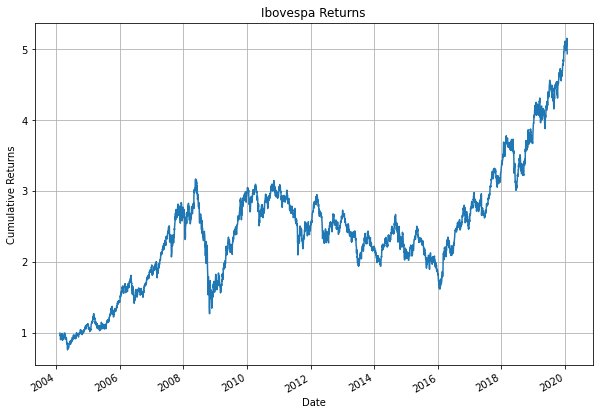

In [11]:
# Set the figure size 

plt.figure(figsize=(10,7))

# Access the dataframe of AAPL from the dictionary
# and then compute and plot the returns
(stock_data_dictionary["^BVSP"].daily_pct_change+1).cumprod().plot()

# (stock_data_dictionary["AAPL"].daily_pct_change+1).cumprod().plot() 
# Set the title and axis labels and plot grid
plt.title("Ibovespa Returns")
plt.ylabel("Cumulative Returns")
plt.grid()
plt.show()


In [12]:
# Create a placeholder for the train and test split data

X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_train = pd.Series()
y_test = pd.Series()

for stock_name in stock_list:

# Get predictor variables
  X = stock_data_dictionary[stock_name][predictor_list]

# Get the target variable
  y = stock_data_dictionary[stock_name].actual_signal

# Divide the dataset into train and test
  train_length = int(len(X)*0.60)

  X_train = X_train.append(X[:train_length])
  X_test = X_test.append(X[train_length:])
  y_train = y_train.append(y[:train_length])
  y_test = y_test.append(y[train_length:])

  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [13]:
X

,pct_change_2,std_2,pct_change_4,std_4,pct_change_6,std_6,pct_change_8,std_8,Open-Close,Open-Open,S_10,Corr,highReturn,lowReturn,Low-High,High/Low,Dist_mean
Date,,,,,,,,,,,,,,,,,
2004-02-11,-0.006507,0.001699,-0.008553,0.002135,-0.003755,0.003066,-0.009186,0.004149,0.0000,-0.0060,2.92460,-0.541416,-0.004455,-0.003089,-0.0270,1.009294,1.018669
2004-02-12,-0.007897,0.000716,-0.012678,0.001028,-0.007883,0.003174,-0.015698,0.003830,0.0000,-0.0130,2.92110,-0.595541,-0.003442,-0.003442,-0.0150,1.005181,1.017521
2004-02-13,-0.000334,0.004632,-0.006841,0.003360,-0.008887,0.002840,-0.004088,0.003135,0.0000,-0.0100,2.91830,-0.586816,0.003109,0.000000,-0.0200,1.006908,1.016216
2004-02-16,0.003797,0.001711,-0.004100,0.003542,-0.008880,0.002841,-0.004085,0.003135,0.0000,0.0090,2.91480,-0.382037,0.000689,0.001727,-0.0150,1.005172,1.014373
2004-02-17,0.004130,0.001946,0.003796,0.003174,-0.002711,0.003366,-0.004757,0.002999,0.0000,0.0020,2.91480,-0.483232,0.003441,0.000345,-0.0190,1.006549,1.013785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-22,0.011812,0.000789,0.008805,0.005283,0.015692,0.006035,0.028912,0.008356,0.0224,0.0222,4.14213,0.919304,0.005348,0.003030,-0.0319,1.007633,1.013249
2020-01-23,-0.001681,0.008752,-0.000476,0.007009,0.012160,0.006866,0.027161,0.008640,-0.0295,-0.0295,4.15398,0.865950,-0.007029,-0.005695,-0.0322,1.007749,1.015670
2020-01-24,-0.009947,0.002907,0.001865,0.006518,-0.001142,0.005671,0.005745,0.006290,-0.0125,-0.0126,4.16168,0.754505,-0.002918,-0.001973,-0.0402,1.009693,1.016875


In [14]:
# Initialize the model and set the hyperparameter values~

model = XGBClassifier(max_depth=4, n_estimators=30)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [15]:
# Initialize the KFold parameters

kfold = KFold(n_splits=5, random_state=30)

# Perform K-Fold Cross Validation

results = cross_val_score(model, X_train, y_train, cv=kfold)

# Print the average results

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Accuracy: 49.88% (2.19%)


In [16]:
# Fit the model

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

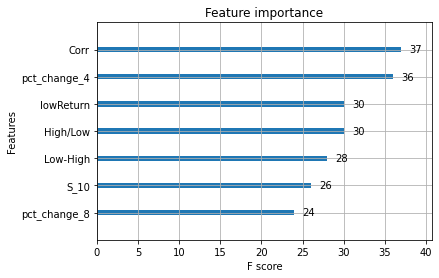

In [17]:
# Plot the top 7 features

xgboost.plot_importance(model, max_num_features=7)

# Show the plot

plt.show()

In [18]:
# Predict the trading signal on test dataset

y_pred = model.predict(X_test)

# Get the classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.57      0.55      1493
           1       0.56      0.51      0.53      1572

    accuracy                           0.54      3065
   macro avg       0.54      0.54      0.54      3065
weighted avg       0.54      0.54      0.54      3065



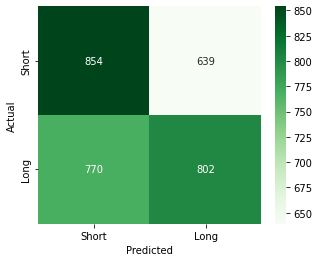

In [19]:
# Confusion Matrix

array = confusion_matrix(y_test, y_pred)

df = pd.DataFrame(array, index=["Short" , "Long"], columns=["Short", "Long"])

plt.figure(figsize=(5,4))

sn.heatmap(df, annot=True, cmap="Greens", fmt="g")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

^BVSP


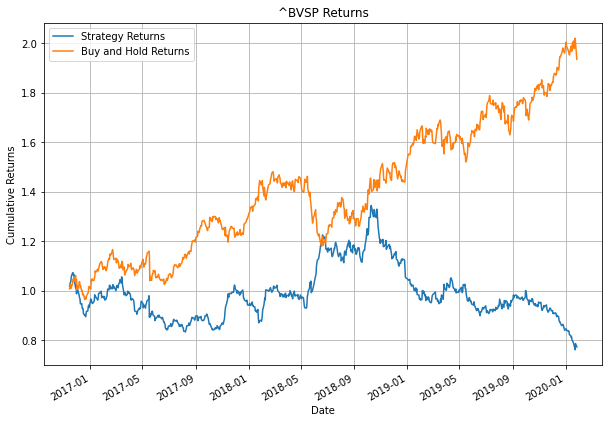

USDBRL=X


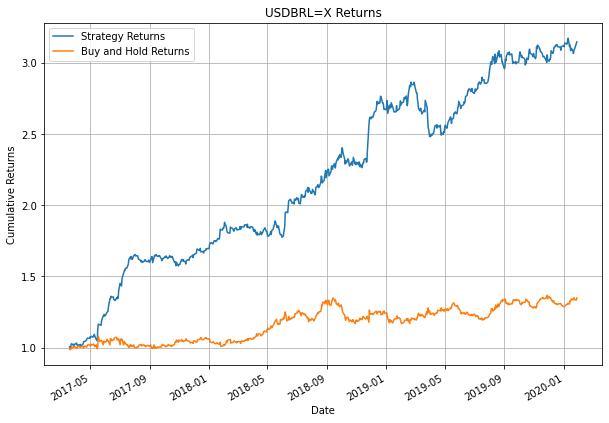

In [20]:
# Create an empty dataframe to store the strategy returns of individual stocks

portfolio = pd.DataFrame(columns=stock_list)

# For each stock in the stock list, plot the strategy returns and buy and hold returns
for stock_name in stock_list:

# Get the data

  df = stock_data_dictionary[stock_name]
  # Store the predictor variables in X

  X = df[predictor_list]

  # Define the train and test  dataset

  train_length = int(len(X)*0.80)

  # Predict the signal and store in predicted signal column

  df["predicted_signal"] = model.predict(X)

  # Calculate the strategy returns

  df["strategy_returns"] = df.return_next_day * df.predicted_signal

  # Add the strategy returns to the portfolio dataframe

  portfolio[stock_name] = df.strategy_returns[train_length:]

  # Plot the stock strategy and buy and hold returns
  print(stock_name)

  # Set the figure size

  plt.figure(figsize=(10,7))

  # Calculate the cumulative strategy returns and plot
  (df.strategy_returns[train_length:]+1).cumprod().plot()

  # Calculate the cumulative buy and hold strategy returns
  (stock_data_dictionary[stock_name][train_length:].daily_pct_change+1).cumprod().plot()

  # Set the title, label and grid
  plt.title(stock_name + " Returns")
  plt.ylabel("Cumulative Returns")
  plt.legend(labels=["Strategy Returns", "Buy and Hold Returns"])
  plt.grid()
  plt.show()


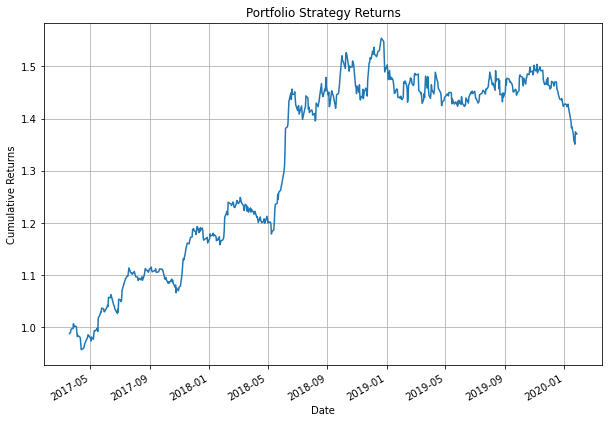

In [21]:
# Drop missing values

portfolio.dropna(inplace=True)

# Set the figure size

plt.figure(figsize=(10,7))

# Calculate the cumualative portfolio returns by assuming equal allocation to the stocks

(portfolio.mean(axis=1)+1).cumprod().plot()

# Set the title and label of the chart

plt.title("Portfolio Strategy Returns")
plt.ylabel("Cumulative Returns")
plt.grid()
plt.show()

In [3]:
pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-owvkr3t4
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-owvkr3t4
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75775 sha256=edbad096f251a466dd798bad237019bc085b5d3d481d255cc13f8cb6a253bce7
  Stored in directory: /tmp/pip-ephem-wheel-cache-wi39s1mc/wheels/2d/aa/24/c99ed55ef37c69e33815248c1622cdb81b65ec753868004c28
Successfully built pyfolio


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


Start date,2017-03-20
End date,2020-01-27
Total months,29
,Backtest
Annual return,13.783%
Cumulative returns,37.042%
Annual volatility,12.136%
Sharpe ratio,1.12
Calmar ratio,1.05
Stability,0.78
Max drawdown,-13.073%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,13.07,2018-12-21,2020-01-23,NaT,NaN
1,5.94,2018-10-10,2018-11-08,2018-12-03,39
2,5.62,2018-03-06,2018-05-09,2018-05-22,56
3,4.96,2017-03-28,2017-04-13,2017-05-18,38
4,4.40,2017-09-04,2017-10-25,2017-11-08,48


Stress Events,mean,min,max
New Normal,0.05%,-2.86%,3.13%


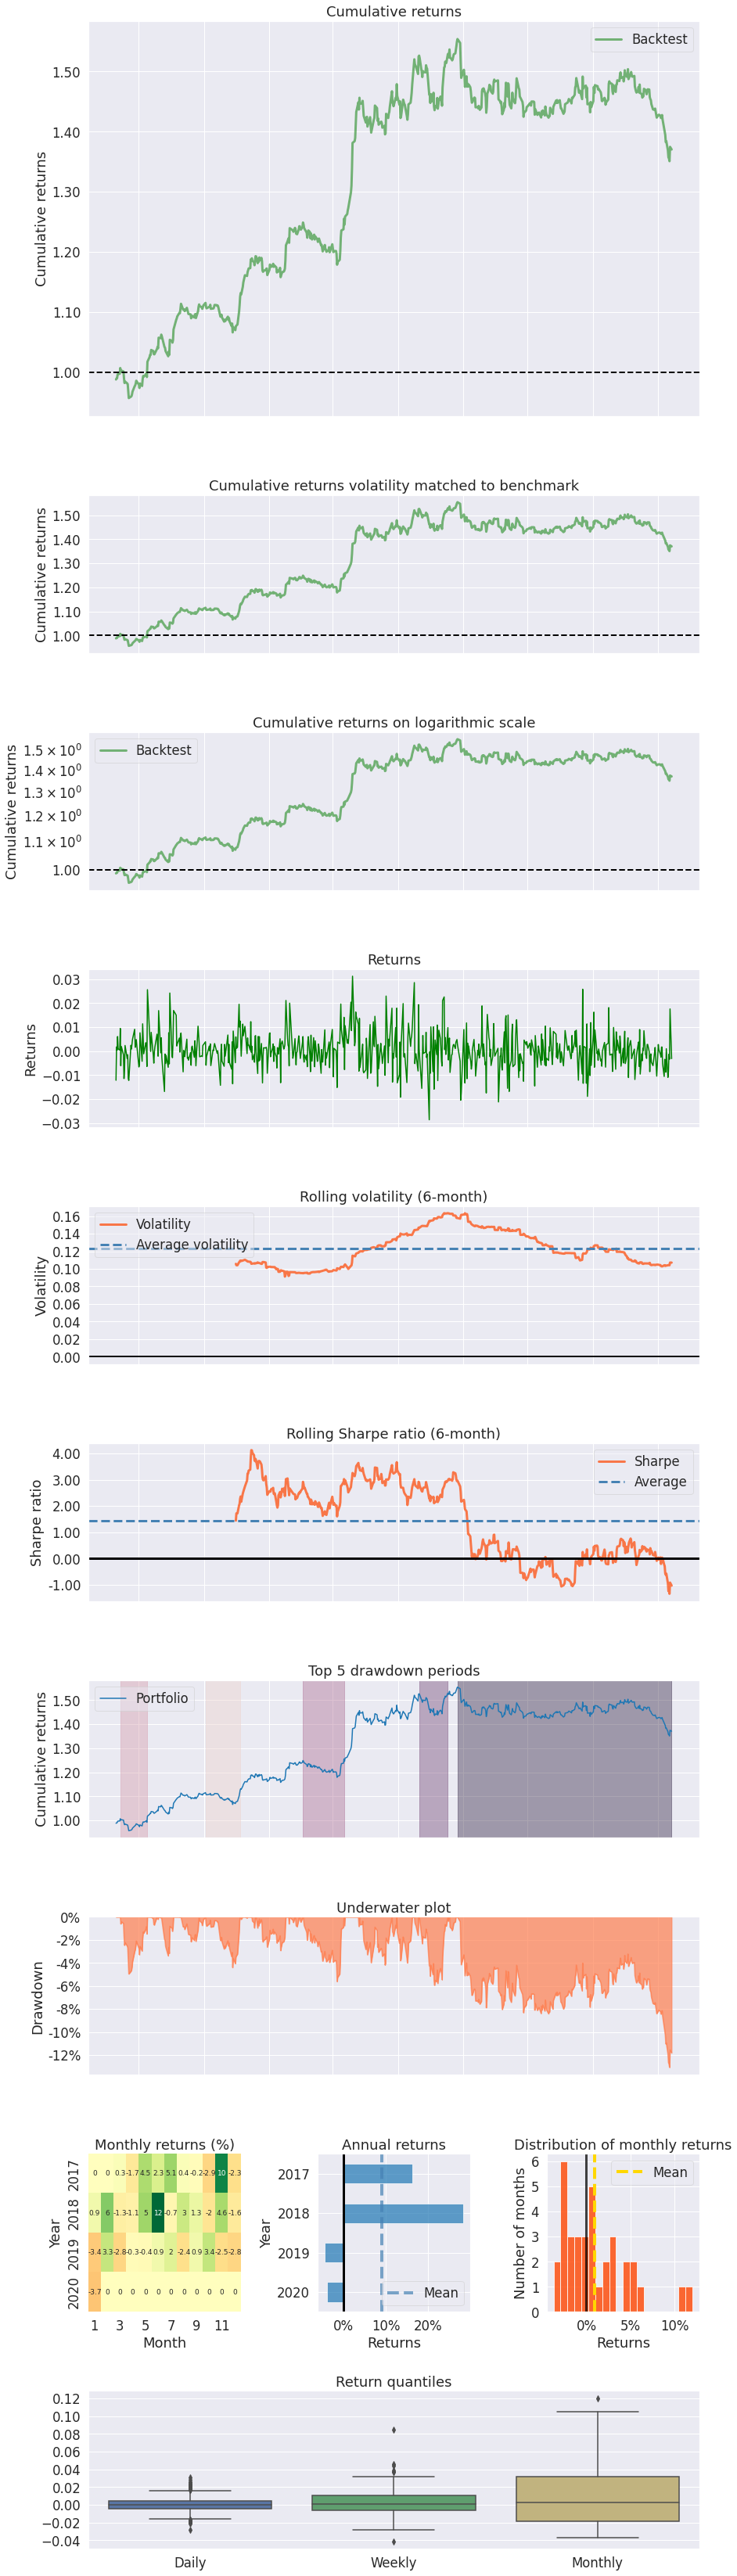

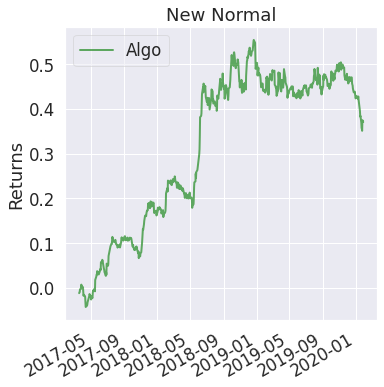

In [22]:
import pyfolio as pf

pf.create_full_tear_sheet(portfolio.mean(axis=1))